In [3]:
# 수정필요
import plotly.express as px
fig = px.parallel_categories(
binary_df[["General trash", "Paper", "Paper pack", "Metal", "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]], 
    color="Paper", 
    color_continuous_scale="sunset",
    title="Parallel categories plot of targets"
    )
fig.show()

NameError: name 'binary_df' is not defined

In [ ]:
# 각 클래스마다 모든 fold에 대해 숫자가 비슷하면 -> 아 균형있게 잘 들어갔구나

[[16.94141395 27.48594223  3.95539963  4.1524487   4.34949777 12.67842553
   5.46450714 22.29057529  0.67765656  2.00413322]
 [17.19781797 27.8208441   3.90946502  4.03387884  4.18700354 12.5179443
   5.59383673 22.07388267  0.66992057  1.99540626]
 [17.03986102 27.80137052  3.86063121  4.10192066  4.12604961 12.63391565
   5.4483158  22.3192742   0.64182994  2.02683139]
 [17.36449048 27.31871838  3.89785594  3.9171284   4.13394363 12.6764635
   5.43001686 22.50060226  0.69380872  2.06697181]
 [17.15390191 27.47523556  3.94781348  3.85600387  4.13143271 12.72771201
   5.56656197 22.47402754  0.67649191  1.99081904]
 [17.01159337 27.07195554  3.722334    4.11995784  4.34032768 12.94433266
   5.45654882 22.58311775  0.70422535  2.04560698]
 [17.19372331 27.25178751  3.86294928  4.07409185  4.23244877 12.7165411
   5.41292768 22.5058784   0.67181727  2.07783483]
 [17.20507298 27.4324001   3.79995214  4.03924384  4.36468055 12.72553242
   5.43670735 22.28284279  0.68916009  2.02440775]
 [1

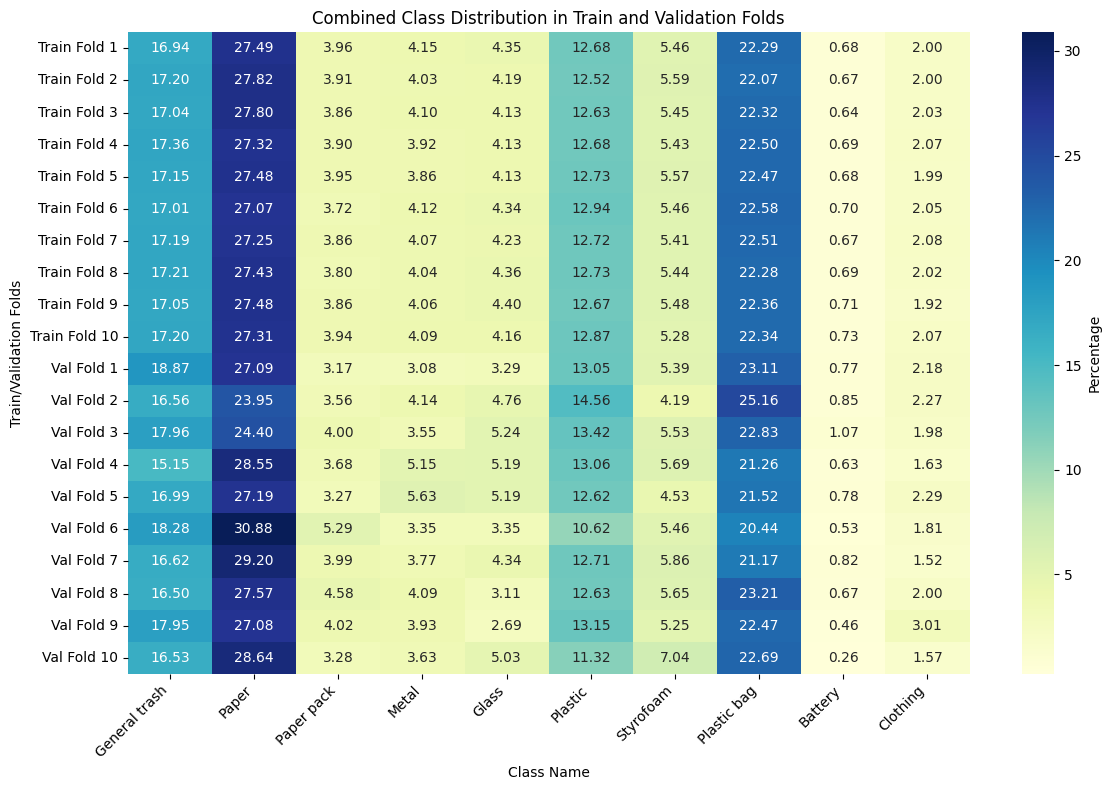

In [17]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_annotations(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return data

def count_class_instances(data):
    category_counts = {}
    total_instances = len(data['annotations'])
    for annotation in data['annotations']:
        category_id = annotation['category_id']
        if category_id in category_counts:
            category_counts[category_id] += 1
        else:
            category_counts[category_id] = 1
    
    for category_id in category_counts:
        category_counts[category_id] = (category_counts[category_id] / total_instances) * 100
    return category_counts

def get_class_names(data):
    categories = data['categories']
    class_names = {}
    for category in categories:
        class_names[category['id']] = category['name']
    return class_names

# k 숫자 직접 세팅
k = 10
# kfold_dataset 경로로 변경
train_jsons = [f'dataset/stratified_{k}fold_dataset/train_fold_{i}.json' for i in range(1, k+1)]
val_jsons = [f'dataset/stratified_{k}fold_dataset/val_fold_{i}.json' for i in range(1, k+1)]

train_class_counts = []
val_class_counts = []
class_names = {}

for train_file, val_file in zip(train_jsons, val_jsons):
    train_data = load_annotations(train_file)
    val_data = load_annotations(val_file)
    
    train_class_counts.append(count_class_instances(train_data))
    val_class_counts.append(count_class_instances(val_data))
    
    if not class_names:
        class_names = get_class_names(train_data)

def dicts_to_matrix(dict_list, num_classes):
    matrix = np.zeros((len(dict_list), num_classes))
    for i, class_count_dict in enumerate(dict_list):
        for class_id, percentage in class_count_dict.items():
            matrix[i, class_id] = percentage 
    return matrix

num_classes = len(class_names)

train_matrix = dicts_to_matrix(train_class_counts, num_classes)
val_matrix = dicts_to_matrix(val_class_counts, num_classes)

combined_matrix = np.vstack([train_matrix, val_matrix])

y_labels = []
for i in range(1, k+1):
    y_labels.append(f'Train Fold {i}')

for i in range(1, k+1):
    y_labels.append(f'Val Fold {i}')

class_labels = [class_names[i] for i in range(num_classes)]

plt.figure(figsize=(12, 8))
sns.heatmap(combined_matrix, annot=True, cmap='YlGnBu', fmt=".2f", xticklabels=class_labels, yticklabels=y_labels, cbar_kws={'label': 'Percentage'})
plt.title('Combined Class Distribution in Train and Validation Folds')
plt.xlabel('Class Name')
plt.ylabel('Train/Validation Folds')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
